In [1]:
import os
import cv2
import tensorflow as tf
import numpy as np
from typing import List
from matplotlib import pyplot as plt
import imageio

In [2]:
physical_device = tf.config.list_physical_devices('GPU')
try:
  tf.config.experimental.set_memory_growth(physical_device[0], True)
except:
  pass

# Data Loading

In [3]:
import gdown

In [4]:
url = "https://drive.google.com/uc?id=1YlvpDLix3S-U8fd-gqRwPcWXAXm8JwjL"
output = 'data.zip'
gdown.download(url, output, quiet = False)

Downloading...
From: https://drive.google.com/uc?id=1YlvpDLix3S-U8fd-gqRwPcWXAXm8JwjL
To: /content/data.zip
100%|██████████| 423M/423M [00:02<00:00, 161MB/s]


'data.zip'

In [5]:
gdown.extractall('/content/data.zip')

['/content/data/',
 '/content/data/alignments/',
 '/content/data/alignments/s1/',
 '/content/data/alignments/s1/bbaf2n.align',
 '/content/data/alignments/s1/bbaf3s.align',
 '/content/data/alignments/s1/bbaf4p.align',
 '/content/data/alignments/s1/bbaf5a.align',
 '/content/data/alignments/s1/bbal6n.align',
 '/content/data/alignments/s1/bbal7s.align',
 '/content/data/alignments/s1/bbal8p.align',
 '/content/data/alignments/s1/bbal9a.align',
 '/content/data/alignments/s1/bbas1s.align',
 '/content/data/alignments/s1/bbas2p.align',
 '/content/data/alignments/s1/bbas3a.align',
 '/content/data/alignments/s1/bbaszn.align',
 '/content/data/alignments/s1/bbaz4n.align',
 '/content/data/alignments/s1/bbaz5s.align',
 '/content/data/alignments/s1/bbaz6p.align',
 '/content/data/alignments/s1/bbaz7a.align',
 '/content/data/alignments/s1/bbbf6n.align',
 '/content/data/alignments/s1/bbbf7s.align',
 '/content/data/alignments/s1/bbbf8p.align',
 '/content/data/alignments/s1/bbbf9a.align',
 '/content/data/al

In [6]:
def load_video(path:str) -> List[float]:

    cap = cv2.VideoCapture(path)
    frames = []
    for _ in range(int(cap.get(cv2.CAP_PROP_FRAME_COUNT))):
        ret, frame = cap.read()
        frame = tf.image.rgb_to_grayscale(frame)
        frames.append(frame[190:236,80:220,:])
    cap.release()

    mean = tf.math.reduce_mean(frames)
    std = tf.math.reduce_std(tf.cast(frames, tf.float32))
    return tf.cast((frames - mean), tf.float32) / std

In [7]:
vocab = [x for x in "abcdefghijklmnopqrstuvwxyz'?!123456789 "]

In [8]:
char_to_num = tf.keras.layers.StringLookup(vocabulary=vocab, oov_token="")
num_to_char = tf.keras.layers.StringLookup(
    vocabulary=char_to_num.get_vocabulary(), oov_token="", invert=True
)

print(
    f"The vocabulary is: {char_to_num.get_vocabulary()} "
    f"(size ={char_to_num.vocabulary_size()})"
)

The vocabulary is: ['', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', "'", '?', '!', '1', '2', '3', '4', '5', '6', '7', '8', '9', ' '] (size =40)


In [9]:
def load_alignments(path:str) -> List[str]:
    with open(path, 'r') as f:
        lines = f.readlines()
    tokens = []
    for line in lines:
        line = line.split()
        if line[2] != 'sil':
            tokens = [*tokens,' ',line[2]]
    return char_to_num(tf.reshape(tf.strings.unicode_split(tokens, input_encoding='UTF-8'), (-1)))[1:]

In [10]:
def load_data(path: str):
  path = bytes.decode(path.numpy())
  file_name = path.split('/')[-1].split('.')[0]
  video_path = os.path.join('data', 's1', f'{file_name}.mpg')
  alignment_path = os.path.join('data', 'alignments', 's1', f'{file_name}.align')
  frames = load_video(video_path)
  alignments = load_alignments(alignment_path)

  return frames, alignments

In [11]:
test_path = '/content/data/s1/bbaf2n.mpg'

In [12]:
load_data(tf.convert_to_tensor(test_path))

(<tf.Tensor: shape=(75, 46, 140, 1), dtype=float32, numpy=
 array([[[[1.4991663 ],
          [1.4991663 ],
          [1.4616871 ],
          ...,
          [0.41227072],
          [0.41227072],
          [0.41227072]],
 
         [[1.4991663 ],
          [1.4991663 ],
          [1.4616871 ],
          ...,
          [0.41227072],
          [0.41227072],
          [0.41227072]],
 
         [[1.4616871 ],
          [1.4616871 ],
          [1.4991663 ],
          ...,
          [0.3373124 ],
          [0.3373124 ],
          [0.3373124 ]],
 
         ...,
 
         [[1.0494163 ],
          [1.0494163 ],
          [1.0119373 ],
          ...,
          [0.11243746],
          [0.11243746],
          [0.07495831]],
 
         [[1.0494163 ],
          [1.0494163 ],
          [1.0119373 ],
          ...,
          [0.11243746],
          [0.07495831],
          [0.07495831]],
 
         [[1.0494163 ],
          [1.0494163 ],
          [1.0119373 ],
          ...,
          [0.07495831],
    

In [13]:
frames, alignments = load_data(tf.convert_to_tensor(test_path))

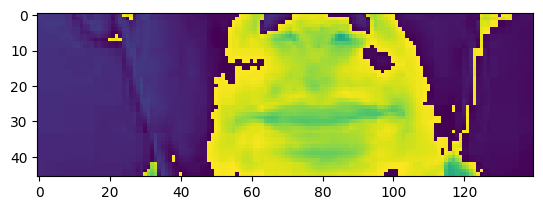

In [14]:
plt.imshow(frames[0])

In [15]:
alignments

<tf.Tensor: shape=(21,), dtype=int64, numpy=
array([ 2,  9, 14, 39,  2, 12, 21,  5, 39,  1, 20, 39,  6, 39, 20, 23, 15,
       39, 14, 15, 23])>

In [16]:
print(tf.strings.reduce_join([bytes.decode(x) for x in num_to_char(alignments.numpy()).numpy()]))

tf.Tensor(b'bin blue at f two now', shape=(), dtype=string)


In [17]:
def mappable_function(path:str) -> List[str]:
  result = tf.py_function(load_data, [path], (tf.float32, tf.int64))
  return result

In [44]:
data = tf.data.Dataset.list_files('./data/s1/*.mpg')  # choose all mpg files
data = data.shuffle(500, reshuffle_each_iteration = False)   # shuffle first 500 files
data = data.map(mappable_function)   # get back in form of frames and alignments
data = data.padded_batch(2, padded_shapes = ([75, None, None, None], [40]))   # 2 videos in each batch, 75 frames per video, and 40 tokens for each frame
data = data.prefetch(tf.data.AUTOTUNE)

train = data.take(450)
test = data.skip(450)

In [19]:
frames, alignments = data.as_numpy_iterator().next()

In [20]:
alignments

array([[12,  1, 25, 39, 18,  5,  4, 39,  9, 14, 39,  4, 39, 14,  9, 14,
         5, 39, 19, 15, 15, 14,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0],
       [19,  5, 20, 39,  2, 12, 21,  5, 39, 23,  9, 20,  8, 39,  8, 39,
        19,  5, 22,  5, 14, 39, 19, 15, 15, 14,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0]])

In [21]:
len(frames)

2

In [22]:
test = data.as_numpy_iterator()

In [23]:
val = test.next(); val[0]

array([[[[[ 1.447499  ],
          [ 1.447499  ],
          [ 1.5236832 ],
          ...,
          [ 0.07618416],
          [ 0.30473664],
          [ 0.34282872]],

         [[ 1.447499  ],
          [ 1.447499  ],
          [ 1.5236832 ],
          ...,
          [ 9.71348   ],
          [ 0.15236832],
          [ 0.26664457]],

         [[ 1.4855912 ],
          [ 1.4855912 ],
          [ 1.4855912 ],
          ...,
          [ 0.26664457],
          [ 0.30473664],
          [ 0.30473664]],

         ...,

         [[ 0.99039406],
          [ 0.99039406],
          [ 0.99039406],
          ...,
          [ 0.        ],
          [ 9.71348   ],
          [ 9.71348   ]],

         [[ 0.99039406],
          [ 0.99039406],
          [ 0.99039406],
          ...,
          [ 9.675388  ],
          [ 9.675388  ],
          [ 9.675388  ]],

         [[ 0.99039406],
          [ 0.99039406],
          [ 0.99039406],
          ...,
          [ 9.675388  ],
          [ 9.675388  ],
          

In [24]:
imageio.mimsave('./animation.gif', val[0][1], fps=10)   # CONVERT TO GIF

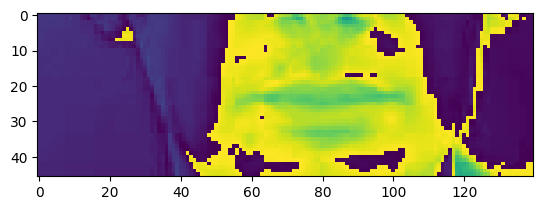

In [25]:
plt.imshow(val[0][0][0])

# 0: videos
# 0: 1st video out of the 2
# 0: 1st frame

In [26]:
tf.strings.reduce_join([num_to_char(word) for word in val[1][0]])

<tf.Tensor: shape=(), dtype=string, numpy=b'bin white sp with n six now'>

# Building Deep Neural Network

In [29]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv3D, LSTM, Dense, Flatten, Dropout, Bidirectional, MaxPool3D, Activation, Reshape, SpatialDropout3D, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, LearningRateScheduler

In [28]:
data.as_numpy_iterator().next()[0][0].shape

(75, 46, 140, 1)

In [30]:
from keras.api._v2.keras.layers import TimeDistributed
model = Sequential()
model.add(Conv3D(128, 3, input_shape = (75, 46, 140, 1), padding = 'same'))   # 128 nodes in layer of Conv3D, each of size 3x3x3
model.add(Activation('relu'))
model.add(MaxPool3D((1, 2, 2)))   # Downsampling, takes max value of each frame and condenses it down to 2x2 square

model.add(Conv3D(256, 3, padding = 'same'))
model.add(Activation('relu'))
model.add(MaxPool3D((1, 2, 2)))

model.add(Conv3D(75, 3, padding = 'same'))
model.add(Activation('relu'))
model.add(MaxPool3D((1, 2, 2)))

model.add(TimeDistributed(Flatten()))

model.add(Bidirectional(LSTM(128, kernel_initializer = 'Orthogonal', return_sequences = True)))   # Actually 256 units cuz bidirectional
model.add(Dropout(.5))

model.add(Bidirectional(LSTM(128, kernel_initializer = 'Orthogonal', return_sequences = True)))
model.add(Dropout(.5))

model.add(Dense(char_to_num.vocabulary_size()+1, kernel_initializer = 'he_normal', activation = 'softmax'))  # One hot encoding of tokens

In [31]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv3d (Conv3D)             (None, 75, 46, 140, 128)  3584      
                                                                 
 activation (Activation)     (None, 75, 46, 140, 128)  0         
                                                                 
 max_pooling3d (MaxPooling3D  (None, 75, 23, 70, 128)  0         
 )                                                               
                                                                 
 conv3d_1 (Conv3D)           (None, 75, 23, 70, 256)   884992    
                                                                 
 activation_1 (Activation)   (None, 75, 23, 70, 256)   0         
                                                                 
 max_pooling3d_1 (MaxPooling  (None, 75, 11, 35, 256)  0         
 3D)                                                    

In [32]:
yhat = model.predict(val[0])

1/1 [==============================] - 10s 10s/step


In [33]:
tf.strings.reduce_join([num_to_char(tf.argmax(x)) for x in yhat[1]])

<tf.Tensor: shape=(), dtype=string, numpy=b'kk7777777kkkkkkkk777777777kkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkk'>

In [34]:
model.input_shape

(None, 75, 46, 140, 1)

In [35]:
model.output_shape

(None, 75, 41)

# Set up training options and Train

In [36]:
def scheduler(epoch, lr):
  if epoch<30:
    return lr
  else:
    return lr * tf.math.exp(-0.1)

In [37]:
def CTCLoss(y_true, y_pred):
  batch_len = tf.cast(tf.shape(y_true)[0], dtype = 'int64')
  input_length = tf.cast(tf.shape(y_pred)[1], dtype = 'int64')
  label_length = tf.cast(tf.shape(y_true)[1], dtype = 'int64')

  input_length = input_length * tf.ones(shape = (batch_len, 1), dtype = 'int64')
  label_length = label_length * tf.ones(shape = (batch_len, 1), dtype = 'int64')

  loss = tf.keras.backend.ctc_batch_cost(y_true, y_pred, input_length, label_length)
  return loss

In [38]:
class ProduceExample(tf.keras.callbacks.Callback):
    def __init__(self, dataset) -> None:
        self.dataset = dataset.as_numpy_iterator()

    def on_epoch_end(self, epoch, logs=None) -> None:
        data = self.dataset.next()
        yhat = self.model.predict(data[0])
        decoded = tf.keras.backend.ctc_decode(yhat, [75,75], greedy=False)[0][0].numpy()
        for x in range(len(yhat)):
            print('Original:', tf.strings.reduce_join(num_to_char(data[1][x])).numpy().decode('utf-8'))
            print('Prediction:', tf.strings.reduce_join(num_to_char(decoded[x])).numpy().decode('utf-8'))
            print('~'*100)

In [49]:
from tensorflow.keras.optimizers import legacy

In [50]:
model.compile(optimizer = legacy.Adam(learning_rate = 0.0001), loss = CTCLoss)

In [51]:
checkpoint_callback = ModelCheckpoint(os.path.join('models', 'checkpoint'), monitor = 'loss', save_weights_only = True)   # save model every epoch

In [52]:
schedule_callback = LearningRateScheduler(scheduler)   # Drops learning rate after epoch 30

In [53]:
example_callback = ProduceExample(data)   # output predictions after each epoch

In [ ]:
model.fit(train, validation_data = test, epochs = 100, callbacks = [checkpoint_callback, schedule_callback, example_callback])

# Make Predictions

In [45]:
url = 'https://drive.google.com/uc?id=1vWscXs4Vt0a_1IH1-ct2TCgXAZT-N3_Y'
output = 'checkpoints.zip'

gdown.download(url, output, quiet = False)
gdown.extractall('checkpoints.zip', 'models')

Downloading...
From: https://drive.google.com/uc?id=1vWscXs4Vt0a_1IH1-ct2TCgXAZT-N3_Y
To: /content/checkpoints.zip
100%|██████████| 94.5M/94.5M [00:03<00:00, 25.9MB/s]


['models/checkpoint.index',
 'models/__MACOSX/._checkpoint.index',
 'models/checkpoint.data-00000-of-00001',
 'models/__MACOSX/._checkpoint.data-00000-of-00001',
 'models/checkpoint',
 'models/__MACOSX/._checkpoint']

In [54]:
model.load_weights('models/checkpoint')

In [55]:
test_data = test.as_numpy_iterator()

In [57]:
sample = test_data.next()

In [58]:
yhat = model.predict(sample[0])

1/1 [==============================] - 3s 3s/step


In [59]:
print('~'*100, 'REAL TEXT')
[tf.strings.reduce_join([num_to_char(word) for word in sentence]) for sentence in sample[1]]

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ REAL TEXT


[<tf.Tensor: shape=(), dtype=string, numpy=b'set blue in m nine soon'>,
 <tf.Tensor: shape=(), dtype=string, numpy=b'bin white in g two please'>]

In [60]:
decoded = tf.keras.backend.ctc_decode(yhat, input_length=[75,75], greedy=True)[0][0].numpy()

In [61]:
print('~'*100, 'PREDICTIONS')
[tf.strings.reduce_join([num_to_char(word) for word in sentence]) for sentence in decoded]

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ PREDICTIONS


[<tf.Tensor: shape=(), dtype=string, numpy=b'set blue in m nine soon'>,
 <tf.Tensor: shape=(), dtype=string, numpy=b'bin white in g two please'>]